# Aquisição e Manipulação de Dados

## Modelagem do Futebol Brasileiro

### Autores: Hanna Rodrigues e Igor Michels

_________________________

### Import's

In [174]:
from functions import *
from glob import glob

_________________________

### Objetivos do negócio:

O projeto objetiva a criação de um modelo de predição de resultados gerais dos jogos do futebol brasileiro em vitória, derrota ou empate, bem como a inferência do campeão brasileiro utilizando um modelo que será implementado utilizando dados disponíveis sobre jogos da Série A do Brasileirão que podem ser encontrados no site da CBF e em outros sites esportivos.


### Avaliação da situação atual:

Atualmente casas de apostas possuem bons modelos preditivos para a elaboração das odds, enquanto modelos mais simples são utilizados, seja em pesquisa ou seja com objetivos didáticos. Além disso, existem muitos dados disponíveis acerca do tema, uma vez que o futebol é o esporte mais popular do planeta, ou seja, pode-se encontrar os mais variados dados facilmente.


### Objetivo da mineração de dados:

A coleta de dados objetiva, inicialmente, os dados mais gerais de uma partida:

 + mandante;
 + visitante;
 + placar e;
 + data.

Tais dados podem ser obtidos diretamente do site da CBF, como realizado [nesse projeto](https://github.com/IgorMichels/Brazilian_Soccer).


### Plano do projeto:
    
 + Coletar dados do futebol brasileiro via scraping
     + ver [esse repositório](https://github.com/IgorMichels/Brazilian_Soccer/tree/main/Scrape_and_some_views/All%20data/Serie%20A)
 + Explorar e verificar a qualidade dos dados coletados
 + Selecionar, limpar e reformatar os dados que alimentarão o modelo
 + Construir e treinar o modelo de previsão de partidas
     + elaborar modelo estimando forças para cada clube, utilizando os jogos anteriores para realizar o treinamento, com jogos mais recentes tendo peso maior
 + Validar e analisar as previsões do modelo
     + para essa etapa a ideia é utilizar os dados do começo dos campeonatos de 2019 e 2020 (10 primeiras rodadas ou primeiro turno inteiro) para realizar o treinamento do modelo e utilizar os parâmetros obtidos para validar o modelo nesses anos
 + Inferir o campeão brasileiro com o modelo implementado
 + Revisar e fazer o deploy do projeto


## II. Data Understanding  (apagar célula)

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

# Entendimento dos Dados

### Coleta Inicial dos Dados

A coleta inicial dos dados já foi realizada em um projeto anterior, conforme seção acima. Dessa forma, realizamos apenas o download dos dados para esse projeto, considerando todos os jogos de todas as competições da CBF no período de 2013 a 2020.

### Descrição dos Dados

Os dados coletados estão no formato ```csv```, com a súmula crua e completa de cada partida, conforme pode ser visto abaixo.

In [175]:
game = 'Data/Serie A/2020/Game 001.csv' # Flamengo e Atlético-MG pela primeira rodada de 2020
lines_2_print = 25
lines = 0
with open(game) as file:
    reader = csv.reader(file, delimiter = ',')
    for row in reader:
        print(row)
        
        lines += 1
        if lines == lines_2_print:
            break

['Campeonato:', 'Campeonato Brasileiro - Série A / 2020', 'Rodada:', '1', '', '']
['Jogo:', 'Flamengo / RJ X Atlético / MG', '', '', '', '']
['Data:', '09/08/2020', 'Horário:', '16:00', 'Estádio:', 'Jornalista Mário Filho / Rio de Janeiro']
['Arbitragem', '']
['Arbitro:', 'Raphael Claus (FIFA / SP)']
['Arbitro Assistente 1:', 'Daniel Paulo Ziolli (AB / SP)']
['Arbitro Assistente 2:', 'Anderson José de Moraes Coelho (AB / SP)']
['Quarto Arbitro:', 'Rafael Martins de Sá (CD / RJ)']
['Analista de Campo:', 'Edilson Soares da Silva (CBF / RJ)']
['VAR:', 'Thiago Duarte Peixoto (AB / SP)']
['AVAR1:', 'Vinicius Furlan (AB / SP)']
['AVAR2:', 'Enderson Emanoel Turbiani da Silva (AB / SP)']
['Observador de VAR:', 'Nilson de Souza Monção (CBF / RJ)']
['Quality manager:', 'Mikael Silva de Araujo (CBF / RJ)']
['Cronologia', '', '', '', '', '', '', '']
['1o Tempo', '2o Tempo', '', '', '', '', '', '']
['Entrada do mandante:', '15:50', 'Atraso:', 'Não Houve', 'Entrada do mandante:', '16:57', 'Atraso:',

Os dados da súmula foram retirados de um ```PDF``` e convertidos para ```csv``` por meio da biblioteca ```tabula```.

### Exploração dos Dados

Essa etapa pensamos em adiar um pouco para realizar após a limpeza dos dados, uma vez que os mesmos precisam ser tratados. Mas uma análise rápida dos dados nos mostra que todos os dados de nosso interesse se encontram no ínicio da súmula, antes da relação de jogadores.

Podemos ver que até esse ponto já pudemos coletar informações como os clubes que estão se enfrentando, a data da partida e o resultado final do jogo:

In [176]:
with open(game) as file:
    reader = csv.reader(file, delimiter = ',')
    for row in reader:
        if 'Relação de Jogadores' in row:
            break
            
        print(row)

['Campeonato:', 'Campeonato Brasileiro - Série A / 2020', 'Rodada:', '1', '', '']
['Jogo:', 'Flamengo / RJ X Atlético / MG', '', '', '', '']
['Data:', '09/08/2020', 'Horário:', '16:00', 'Estádio:', 'Jornalista Mário Filho / Rio de Janeiro']
['Arbitragem', '']
['Arbitro:', 'Raphael Claus (FIFA / SP)']
['Arbitro Assistente 1:', 'Daniel Paulo Ziolli (AB / SP)']
['Arbitro Assistente 2:', 'Anderson José de Moraes Coelho (AB / SP)']
['Quarto Arbitro:', 'Rafael Martins de Sá (CD / RJ)']
['Analista de Campo:', 'Edilson Soares da Silva (CBF / RJ)']
['VAR:', 'Thiago Duarte Peixoto (AB / SP)']
['AVAR1:', 'Vinicius Furlan (AB / SP)']
['AVAR2:', 'Enderson Emanoel Turbiani da Silva (AB / SP)']
['Observador de VAR:', 'Nilson de Souza Monção (CBF / RJ)']
['Quality manager:', 'Mikael Silva de Araujo (CBF / RJ)']
['Cronologia', '', '', '', '', '', '', '']
['1o Tempo', '2o Tempo', '', '', '', '', '', '']
['Entrada do mandante:', '15:50', 'Atraso:', 'Não Houve', 'Entrada do mandante:', '16:57', 'Atraso:',

### Verificando a Qualidade dos Dados

Essa etapa acaba sendo rápida nesse caso, pois os dados foram obtidos das súmulas das partidas que estão no site da CBF, ou seja, são dados oficiais de cada jogo e que se encontram no site oficial do organizador do evento.

## III. Data Preparation (apagar célula)

+ Select data:   
+ Clean data:   
+ Construct data/transform data/feature engineering:   
+ Integrate data:   
+ (Re) Format data:   

# Preparação dos Dados

### Seleção e Limpeza dos Dados

Conforme citado anteriormente, tomamos os dados de todos os jogos de todas as competições da CBF de 2013 a 2020. Como estamos interessados na modelagem da primeira divisão, nessa etapa iremos fazer a seleção dos jogos entre os clubes que já estiveram na Série A, em qualquer que seja a competição.

Pensando em otimizar o processo, decidimos unificar a etapa de seleção e limpeza dos dados. Dessa forma, enquanto passamos por cada jogo, já iremos ver se os clubes que estão se enfrentando estiveram na Série A em algum desses anos. Se sim, então a gente guarda os dados dessa partida, caso contrário essa partida não será de grande valia para nossa análise, então descartamos a mesma.

**OBS:** A ideia de pegar todas as competições se dá pelo fato de que, na Série A, ocorre, a cada ano, a renovação de 20% dos clubes (4 são rebaixados e 4 são promovidos), então para termos dados prévios desses clubes que foram promovidos uma opção é a de utilizar os jogos de divisões inferiores.

In [177]:
# our code here
save = []
competitions = sorted(glob('Data/S*')) + glob('Data/C*') # garantir que a Série A seja a primeira da lista
competitions1 = [competitions[0]] # only Serie A
competitions2 = competitions[1:]

clubs = []
for competition in competitions1:
    years = sorted(glob(competition + '/*'))
    for year in years:
        games = sorted(glob(year + '/Game *'))
        for game in games:
            save.append([game[5:game.find('/', 5)]])
            try:
                teams = find_teams(game)
                date = find_date(game)
                score = find_score(game)
                for team in teams:
                    save[-1].append(team)
                    if team not in clubs:
                        clubs.append(team)

                save[-1].append(score)
                for info in date:
                    save[-1].append(info)

            except UnicodeDecodeError:
                print('UnicodeDecodeError at ' + game)
                save.pop()
                
for competition in competitions2:
    years = sorted(glob(competition + '/*'))
    for year in years:
        games = sorted(glob(year + '/Game *'))
        for game in games:
            save.append([game[5:game.find('/', 5)]])
            try:
                teams = find_teams(game)
                if len(teams) == 2 and teams[0] in clubs and teams[1] in clubs:
                    date = find_date(game)
                    score = find_score(game)
                    for team in teams:
                        save[-1].append(team)
                        if team not in clubs:
                            clubs.append(team)

                    save[-1].append(score)
                    for info in date:
                        save[-1].append(info)
                else:
                    save.pop()

            except UnicodeDecodeError:
                # CdB - 2016 - game 122 is Fluminense vs Ypiranga
                print('UnicodeDecodeError at ' + game)
                save.pop()

No score found at Data/Serie A/2016/Game 378.csv, returned 0 x 0
UnicodeDecodeError at Data/Copa do Brasil/2016/Game 122.csv


In [5]:
for game in save[-5:]:
    print(game)

['Copa do Brasil', 'Bahia / BA', 'Atlético / MG', '2 x 1', '11', '2021', '04/08/2021']
['Copa do Brasil', 'Athlético / PR', 'Santos / SP', '1 x 0', '11', '2021', '25/08/2021']
['Copa do Brasil', 'Grêmio / RS', 'Flamengo / RJ', '0 x 4', '11', '2021', '25/08/2021']
['Copa do Brasil', 'São Paulo / SP', 'Fortaleza / CE', '2 x 2', '12', '2021', '25/08/2021']
['Copa do Brasil', 'Fluminense / RJ', 'Atlético / MG', '1 x 2', '12', '2021', '26/08/2021']


In [178]:
with open('data.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['Competition', 'Team 1', 'Team 2', 'Result', 'Round', 'Year', 'Date'])
    for game in save:
        writer.writerow(game)

Tendo realizado essa etapa, obtemos um arquivo ```csv``` contendo apenas os dados dos jogos de nosso interesse e, agora sim, vamos a Exploração dos Dados.

### Exploração dos Dados

Uma ideia inicial para essa etapa é visualizar nossos dados em um ```dataframe```, possibilitando uma visão geral dos mesmos.

In [265]:
df = pd.read_csv('data.csv')
df

,Competition,Team 1,Team 2,Result,Round,Year,Date
0,Serie A,Vasco da Gama / RJ,Portuguesa / SP,1 x 0,1,2013,25/05/2013
1,Serie A,Fluminense / RJ,Athlético / PR,2 x 1,1,2013,NaN
2,Serie A,Corinthians / SP,Botafogo / RJ,1 x 1,1,2013,NaN
3,Serie A,Vitória / BA,Internacional / RS,2 x 2,1,2013,NaN
4,Serie A,Grêmio / RS,Náutico / PE,2 x 0,1,2013,NaN
...,...,...,...,...,...,...,...
4446,Copa do Brasil,Bahia / BA,Atlético / MG,2 x 1,11,2021,04/08/2021
4447,Copa do Brasil,Athlético / PR,Santos / SP,1 x 0,11,2021,25/08/2021
4448,Copa do Brasil,Grêmio / RS,Flamengo / RJ,0 x 4,11,2021,25/08/2021
4449,Copa do Brasil,São Paulo / SP,Fortaleza / CE,2 x 2,12,2021,25/08/2021


In [266]:
import matplotlib.dates as dates
#import random

df['Num_Date'] = dates.date2num(pd.to_datetime(df['Date']))
df.head(10)

,Competition,Team 1,Team 2,Result,Round,Year,Date,Num_Date
0,Serie A,Vasco da Gama / RJ,Portuguesa / SP,1 x 0,1,2013,25/05/2013,15850.0
1,Serie A,Fluminense / RJ,Athlético / PR,2 x 1,1,2013,NaN,NaN
2,Serie A,Corinthians / SP,Botafogo / RJ,1 x 1,1,2013,NaN,NaN
3,Serie A,Vitória / BA,Internacional / RS,2 x 2,1,2013,NaN,NaN
4,Serie A,Grêmio / RS,Náutico / PE,2 x 0,1,2013,NaN,NaN
5,Serie A,Ponte Preta / SP,São Paulo / SP,0 x 2,1,2013,NaN,NaN
6,Serie A,Criciúma / SC,Bahia / BA,3 x 1,1,2013,NaN,NaN
7,Serie A,Cruzeiro / MG,Goiás / GO,5 x 0,1,2013,NaN,NaN
8,Serie A,Coritiba / PR,Atlético / MG,2 x 1,1,2013,NaN,NaN
9,Serie A,Santos / SP,Flamengo / RJ,0 x 0,1,2013,26/05/2013,15851.0


<AxesSubplot:>

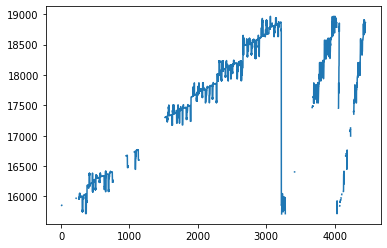

In [267]:
df['Num_Date'].plot()

<AxesSubplot:>

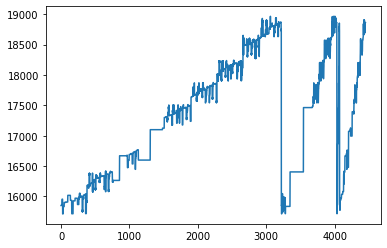

In [268]:
df['Num_Date'].interpolate(method='nearest').plot()

In [269]:
df['Num_Date'].interpolate(method='nearest',inplace = True)
df['Num_Date'] = df['Num_Date'].apply(np.round)
df['Num_Date'] = dates.num2date(df['Num_Date'])
df['Num_Date'] = df['Num_Date'].dt.strftime('%d/%m/%Y')

In [270]:
df.head(30)

,Competition,Team 1,Team 2,Result,Round,Year,Date,Num_Date
0,Serie A,Vasco da Gama / RJ,Portuguesa / SP,1 x 0,1,2013,25/05/2013,25/05/2013
1,Serie A,Fluminense / RJ,Athlético / PR,2 x 1,1,2013,NaN,25/05/2013
2,Serie A,Corinthians / SP,Botafogo / RJ,1 x 1,1,2013,NaN,25/05/2013
3,Serie A,Vitória / BA,Internacional / RS,2 x 2,1,2013,NaN,25/05/2013
4,Serie A,Grêmio / RS,Náutico / PE,2 x 0,1,2013,NaN,25/05/2013
5,Serie A,Ponte Preta / SP,São Paulo / SP,0 x 2,1,2013,NaN,26/05/2013
6,Serie A,Criciúma / SC,Bahia / BA,3 x 1,1,2013,NaN,26/05/2013
7,Serie A,Cruzeiro / MG,Goiás / GO,5 x 0,1,2013,NaN,26/05/2013
8,Serie A,Coritiba / PR,Atlético / MG,2 x 1,1,2013,NaN,26/05/2013
9,Serie A,Santos / SP,Flamengo / RJ,0 x 0,1,2013,26/05/2013,26/05/2013


In [182]:
df['Num_Date'].interpolate(inplace = True).
df.head(10)

AttributeError: 'NoneType' object has no attribute 'ceil'

Podemos ver que existem muitos dados faltantes na coluna Date. Isso nos dá duas opções:

+ excluir essa coluna e considerar as colunas Year e Round como lapso temporal (isso implicaria na exclusão das partidas da Copa do Brasil, que, como veremos abaixo, são 380 ao todo);
+ ou usar os valores que temos para inferir os valores faltantes (os jogos de uma mesma rodada tendem a ser no mesmo intervalo de 2 a 3 dias, o que facilitaria o processo).

In [190]:
count = 0
for game in save:
    if 'Copa do Brasil' in game[0]:
        count += 1
        
count

380

Por fim, uma forma de analisar a coerência dos dados se dá pela análise da classificação final. Isso é, se a classificação final dos jogos com os dados coletados coincide com a classificação final do campeonato, os dados devem estar corretos (a probabilidade de ocorrerem dois ou mais erros, um anulando o outro, é muito baixa).

Para isso, tomamos a classificação final do campeonato:

In [9]:
year = 6 # 2013 = 0, 2014 = 1, etc
br = df.loc[380 * year:379 + 380 * year, ['Team 1', 'Team 2', 'Result']]
table = classification(br)
table

,points,games,wins,draws,defeats,goals for,goals against,goal difference
Flamengo / RJ,90,38,28,6,4,86,37,49
Santos / SP,74,38,22,8,8,60,33,27
Palmeiras / SP,74,38,21,11,6,61,32,29
Grêmio / RS,65,38,19,8,11,64,39,25
Athlético / PR,64,38,18,10,10,51,32,19
São Paulo / SP,63,38,17,12,9,39,30,9
Internacional / RS,57,38,16,9,13,44,39,5
Corinthians / SP,56,38,14,14,10,42,34,8
Fortaleza / CE,53,38,15,8,15,50,49,1
Goiás / GO,52,38,15,7,16,46,64,-18


Histograma de gols por partidas???

### Transformação dos Dados

escrever...

### Integração dos Dados

escrever...

### Formatação dos Dados

escrever...

## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 